<a href="https://colab.research.google.com/github/vkvinay0627/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Cardiovascular Risk Prediction </u></b>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

Data Description
Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV



# **Importing and Understanding of Data**



## Importing Data

In [157]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [159]:
# from google.colab import drive
# drive.mount('/content/drive')

In [160]:
df=pd.read_csv("/content/drive/MyDrive/Almabetter/data_cardiovascular_risk.csv", encoding= 'unicode_escape')

In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. I know this is time-consuming, but it will give us the flavour of our dataset.

In order to have some discipline in our analysis, we can create an Excel spreadsheet with the following columns:



*   **Variable** - Variable name.

*   **Type** - Identification of the variables' type. There are two possible values for this field: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.

*   **Expectation** - Our expectation about the variable influence in **'TenYearCHD'**.
*   **Conclusion** - Our conclusions about the importance of the variable, after we give a quick look at the data.


*   **Comments** - Any general comments that occured to us.









## Understanding of Data

In [161]:
##### Data_filter Module
#     we have created three modules 1. Data_filter 2. EDA  3. Machine Learning
#     Rather of calling these functions through three distinct scripts, we've placed them in these primary notebooks before using them to keep everything in one place.
#     For modularity, these scripts can be called individually.

# Missing Value Count Function
def show_missing(DataFrame):                                                                             # defining fucntion
    missing = DataFrame.columns[DataFrame.isnull().any()].tolist()
#     return missing

    # Missing data counts and percentage
    print('Missing Data Count')
    print(DataFrame[missing].isnull().sum().sort_values(ascending = False))                             # shows the count of missing values for a column
    print('--'*50)
    print('Missing Data Percentage')
    print(round(DataFrame[missing].isnull().sum().sort_values(ascending = False)/len(DataFrame)*100,2)) # shows the percentage of missing values out of whole DataFrame 
#-----------------------------------------------------------------------------------------------------------------------------#
# Functions to impute NULL values

def impute_nan_mean(df,variable):                                               # This will impute NULL values in a column with mean of column values.
    df[variable].fillna(df[variable].mean(),inplace = True)
    
def impute_nan_median(df,variable):                                             # This will impute NULL values in a column with median of column values.
    df[variable].fillna(df[variable].median(),inplace = True)
    
def drop_column(df,variable):                                                   # This will drop the columns which we dont require.
    df.drop([variable],axis=1,inplace = True)
#-----------------------------------------------------------------------------------------------------------------------------#
# Functions to find Categorical and Numerical Columns in a DataFrame

def Categorical_columns(df):                                                    # to see all Categorical Columns.
    Categorical_columns = df.iloc[:,:]
    discrete_cat = []
    for var in Categorical_columns:
        if len(df[var].unique())<20:
            print(var, ' values: ', df[var].unique())
            discrete_cat.append(var)    
    print('There are {} Categorical columns'.format(len(discrete_cat)))
      
def Numerical_columns(df):                                                      # to see all Numerical Columns.
    Numerical_columns = df.iloc[:,:]
    discrete_num = []
    for var in Numerical_columns:
        if len(df[var].unique())>10:
            print(var)
            discrete_num.append(var)
    print('There are {} Numerical columns'.format(len(discrete_num)))
#-----------------------------------------------------------------------------------------------------------------------------#

In [162]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [163]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [164]:
show_missing(df)   

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


**Observations**-
* Seven columns in the data contain NULL values.
* We can 'id' and 'education' columns, as these are irrelevent for our analysis.
* 'heartRate','BMI', 'glucose' and 'cigsPerDay' will be imputed with mean.
* 'BPMeds' will be imputed with median and leftover rows with NULL can be dropped from data.

In [165]:
var_mean = ['heartRate','BMI', 'glucose', 'cigsPerDay' ]                        # NULL-valued columns that will be imputed with mean.
for var in var_mean:
        impute_nan_mean(df,var)
        
var_median  = ['BPMeds']                                                        # NULL-valued columns that will be imputed with mean.
for var in var_median:
        impute_nan_median(df,var)


var_drop = ['id','education']                                                   # NULL-valued columns to drop.
for var in var_drop:
        drop_column(df,var)

df.dropna(axis=0,inplace=True)

In [166]:
df.isna().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

* No missing values are present in our Data.

In [167]:
Numerical_columns(df)

age
cigsPerDay
totChol
sysBP
diaBP
BMI
heartRate
glucose
There are 8 Numerical columns


* There are 8 Numerical Columns.

In [168]:
Categorical_columns(df)

sex  values:  ['F' 'M']
is_smoking  values:  ['YES' 'NO']
BPMeds  values:  [0. 1.]
prevalentStroke  values:  [0 1]
prevalentHyp  values:  [0 1]
diabetes  values:  [0 1]
TenYearCHD  values:  [1 0]
There are 7 Categorical columns


* There are 7 Categorical Columns.

# **Exploratory Data Analyis**

In [169]:
##### EDA Module

# Function to make a list of all Categorical Columns.
def Categorical_columns_list(df):
    Categorical_columns = df.iloc[:,:]
    discrete_cat = []
    for var in Categorical_columns:
        if len(df[var].unique())<20:
            discrete_cat.append(var)
    return discrete_cat

# Function to make a list of all Numerical Columns.
def Numerical_columns_list(df):
    Numerical_columns = df.iloc[:,:]
    discrete_num = []
    for var in Numerical_columns:
        if len(df[var].unique())>10:
            discrete_num.append(var)
    return discrete_num
#-----------------------------------------------------------------------------------------------------------------------
# Function to generate plots of Categorical Columns for Univariate Analysis.
def univariate_categorical_EDA(df,discrete_cat):
    for col in discrete_cat:
        counts = df[col].value_counts().sort_index()
        import matplotlib.pyplot as plt 
        fig = plt.figure(figsize=(6, 5))
        ax = fig.gca()
        counts.plot.bar(ax = ax, color='steelblue')
        ax.set_title(col + ' counts')
        ax.set_xlabel(col) 
        ax.set_ylabel("Frequency")
    plt.show()

# Function to generate plots of Numerical Columns for Univariate Analysis.   
def univariate_numerical_EDA(df,discrete_num):
    for col in discrete_num:
        import matplotlib.pyplot as plt 
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        feature = df[col]
        feature.hist(bins=50, ax = ax)
        ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
        ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
        ax.set_title(col)
    plt.show()
#-----------------------------------------------------------------------------------------------------------------------    
def heat_map(df):
    corr = df.corr()
    import matplotlib.pyplot as plt 
    plt.figure(figsize=(15,10))
    import seaborn as sns 
    sns.heatmap(corr, annot=True, annot_kws={'size':15},cmap='coolwarm')

## Uni-variate Analysis

* In Univariate Analysis, we will first separate the columns on the basis of numerical features and categorical features and then do their count distribution.

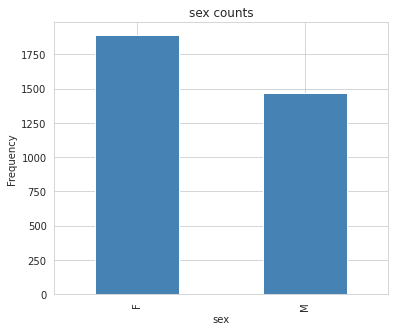

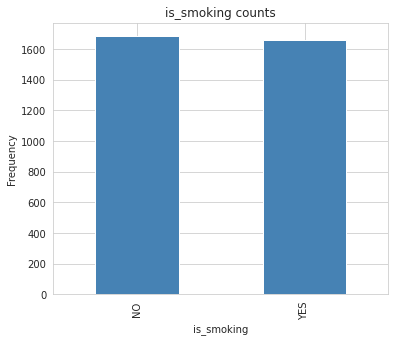

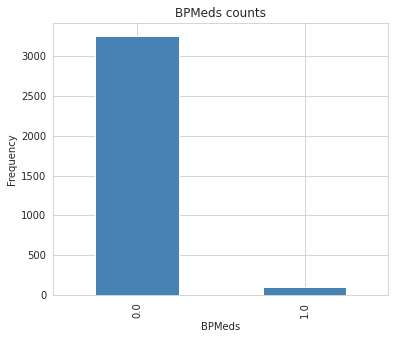

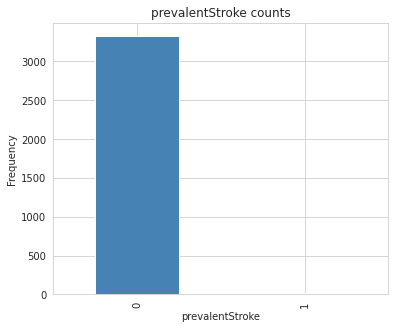

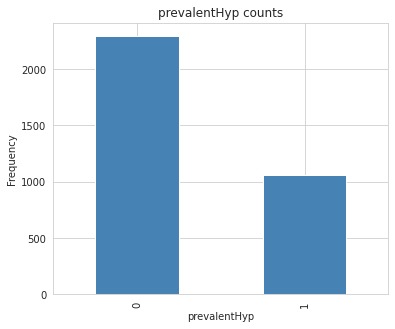

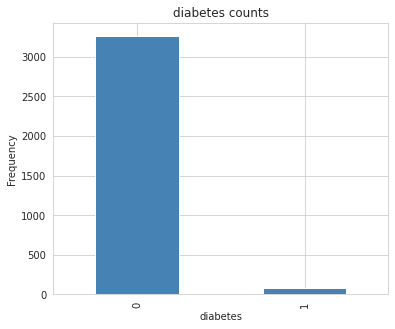

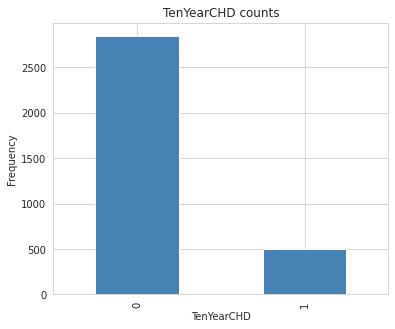

In [170]:
list_cat = Categorical_columns_list(df)
univariate_categorical_EDA(df,list_cat)

Observations -

* Distribution of columns Sex, is_smoking and prevalentHYP seems normal.
* We see data imbalance in 'diabetes', 'prevalentstroke'. So we will check their co-relation and will drop any one of them.

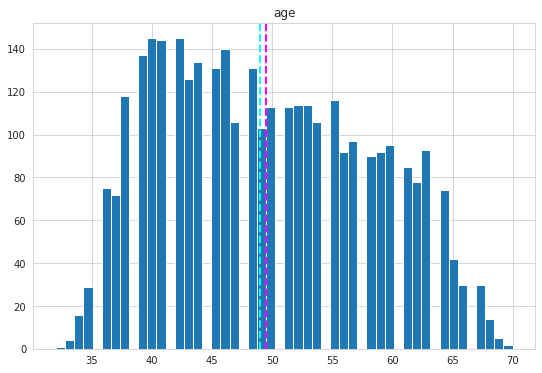

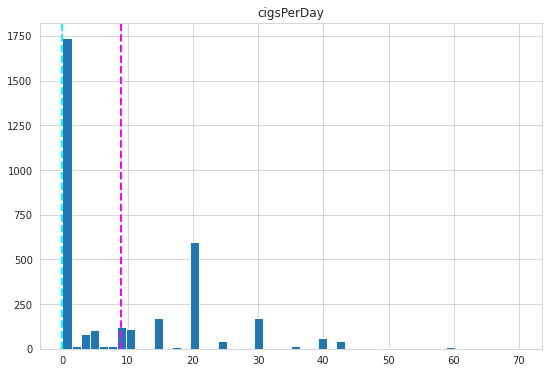

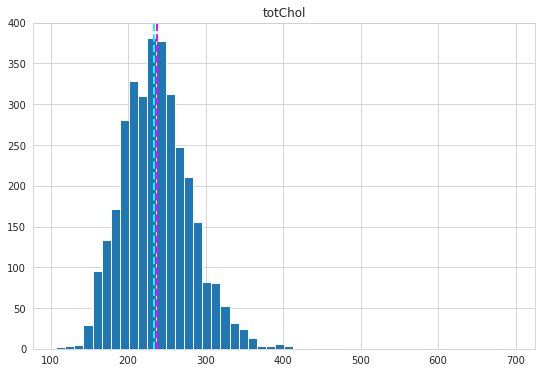

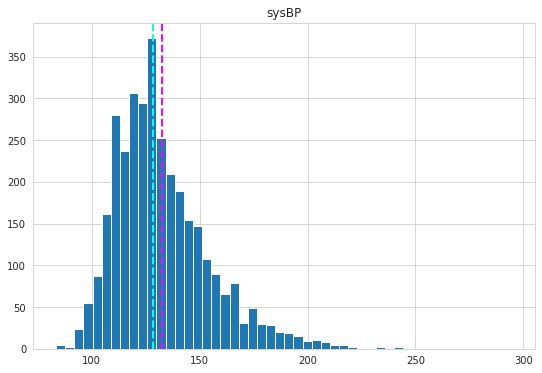

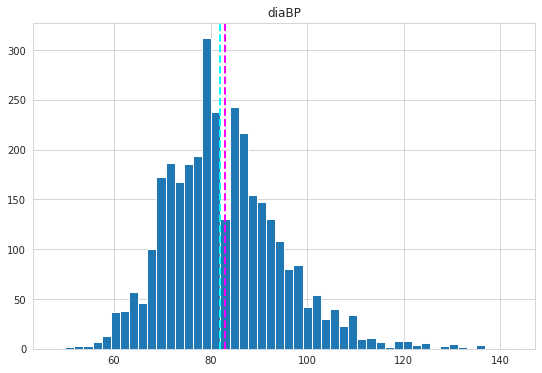

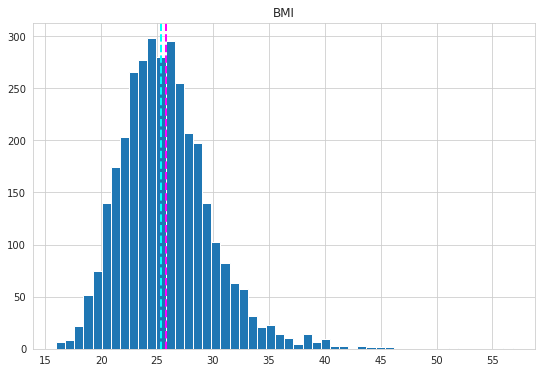

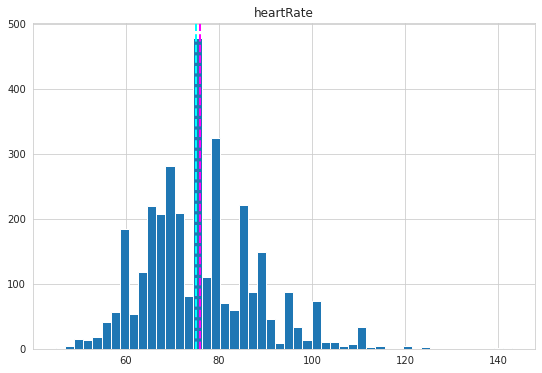

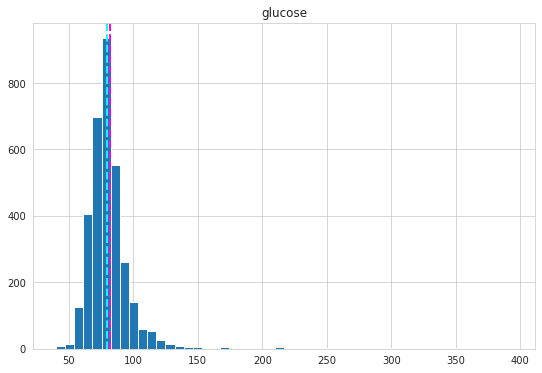

In [171]:
list_num = Numerical_columns_list(df)
univariate_numerical_EDA(df,list_num)

**Observations** -

* Distribution of columns age, tolchol, sysBP, diaBP, BMI and Dew Heart rate seem normal.
* Distribution of columns Glucose is skwewed as the range of values is very less.

## Bi-variate and Multivariate Analysis

In [172]:
import plotly.express as px
reoutput = {0: 'No heart disease', 1: 'Heart disease'}
df['TenYearCHD'] = df['TenYearCHD'].map(reoutput)

fig = px.pie(df['TenYearCHD'].value_counts().reset_index(), values = 'TenYearCHD', names = 'index', width = 500, height = 500)
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.8, 
                  marker = dict(colors = ['#8d230f','#1e434c'], line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'Distribution of <br> heart disease <br> in patients', 
                                      x = 0.5, y = 0.5, font_size = 28, showarrow = False, 
                                      font_family = 'monospace',
                                      font_color = 'black')],
                  showlegend = False)
reoutput = {'No heart disease': 0,'Heart disease': 1}
df['TenYearCHD'] = df['TenYearCHD'].map(reoutput)                  
fig.show()

In [174]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


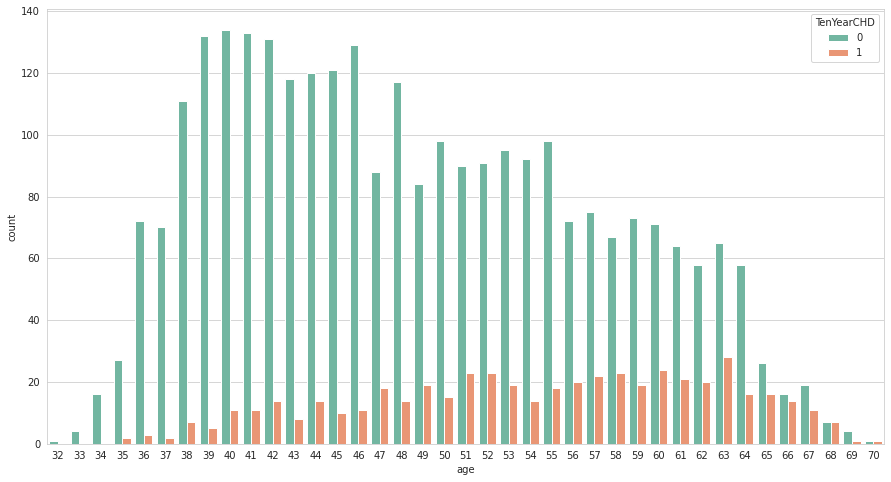

In [175]:
rcParams['figure.figsize'] = 15, 8
sns.countplot(x='age', hue='TenYearCHD', data = df, palette="Set2");

* People between the ages of 35 and 50 are less likely to develop chronic health problems.

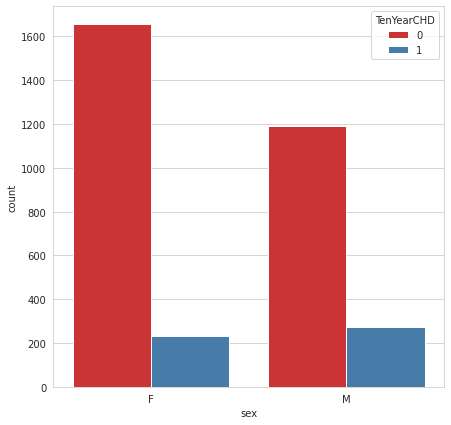

In [176]:
rcParams['figure.figsize'] = 7, 7
sns.countplot(x='sex', hue='TenYearCHD', data = df, palette="Set1");

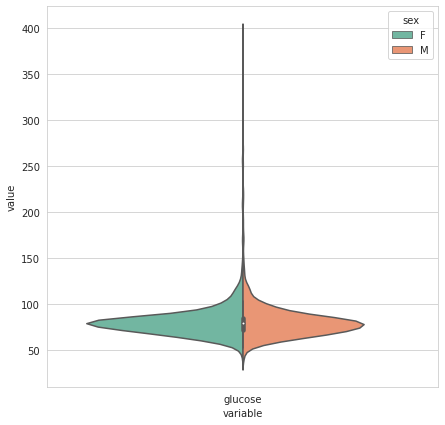

In [177]:
# Height Distribution
df_melt = pd.melt(frame=df, value_vars=['glucose'], id_vars=['sex'])
plt.figure(figsize=(7, 7))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='sex', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

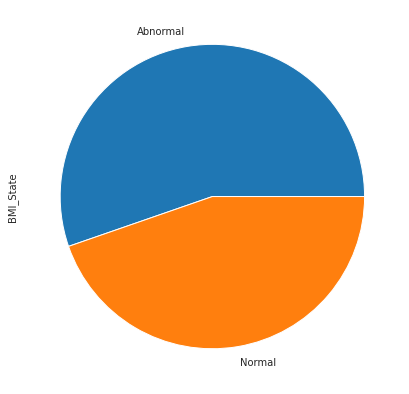

In [178]:
# categorize normal & abnormal
def bmi_categorize(bmi_score):
  if 18.5 <= bmi_score <= 25:
    return "Normal"
  else:
    return "Abnormal"

df["BMI_State"] = df["BMI"].apply(lambda x: bmi_categorize(x))
df["BMI_State"].value_counts().plot(kind='pie')
df = df.drop(["BMI_State"] , 1)

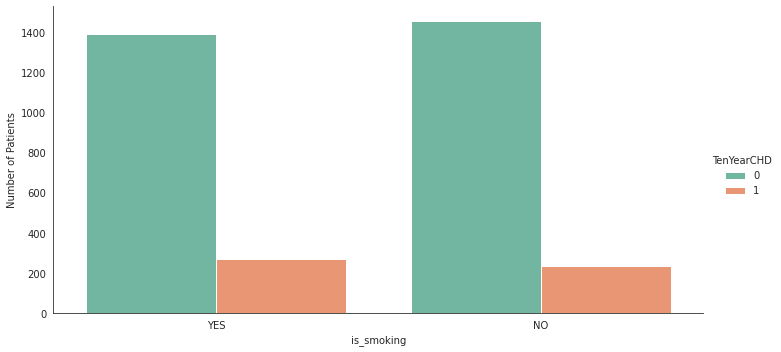

In [179]:
with sns.axes_style('white'):
    g = sns.factorplot("is_smoking", data=df, aspect=2.0, kind='count',
                       hue='TenYearCHD', palette="Set2")
    g.set_ylabels('Number of Patients')

* We dont see any major difference in heart disease risk for people who smoke.

# **Feature Engineering**

* As we get closer to constructing our Machine Learning model, we should look at the relationships between all of the variables, as well as between the dependent and independent variables.

In [180]:
df = pd.get_dummies(df , columns = ['sex', 'is_smoking'] , prefix = ["sex" , "smoke"] , drop_first=True)

* We used One Hot Encoding to produce binary integers of 0 and 1 to encode our categorical features because categorical features that are in string format cannot be understood by the machine and needs to be converted to numerical format.

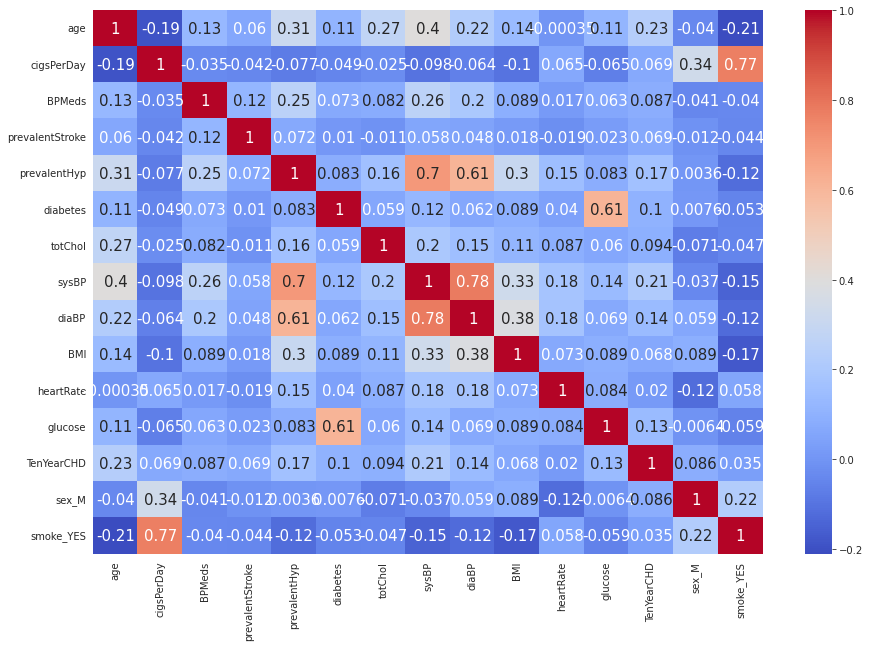

In [181]:
heat_map(df)

**Observations**

* Because there is a strong link between sysBP and diaBP, we can add these two columns to make a new **Bp** column.
* smoke_yes and cigsPerDay are also strongly co-related. So, we can drop smoke_yes.
* Glucose and diabetes are also strongly strongly co-related. So, we can drop diabetes.

In [182]:
df['Bp'] = df['sysBP'] + df['diaBP']
df = df.drop(['smoke_YES','sysBP','diaBP','diabetes'] , 1)
df.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,BMI,heartRate,glucose,TenYearCHD,sex_M,Bp
0,64,3.0,0.0,0,0,221.0,25.794964,90.0,80.0,1,0,233.0
1,36,0.0,0.0,0,1,212.0,29.770000,72.0,75.0,0,1,266.0
2,46,10.0,0.0,0,0,250.0,20.350000,88.0,94.0,0,0,187.0
3,50,20.0,0.0,0,1,233.0,28.260000,68.0,94.0,1,1,246.0
4,64,30.0,0.0,0,0,241.0,26.420000,70.0,77.0,0,0,221.5


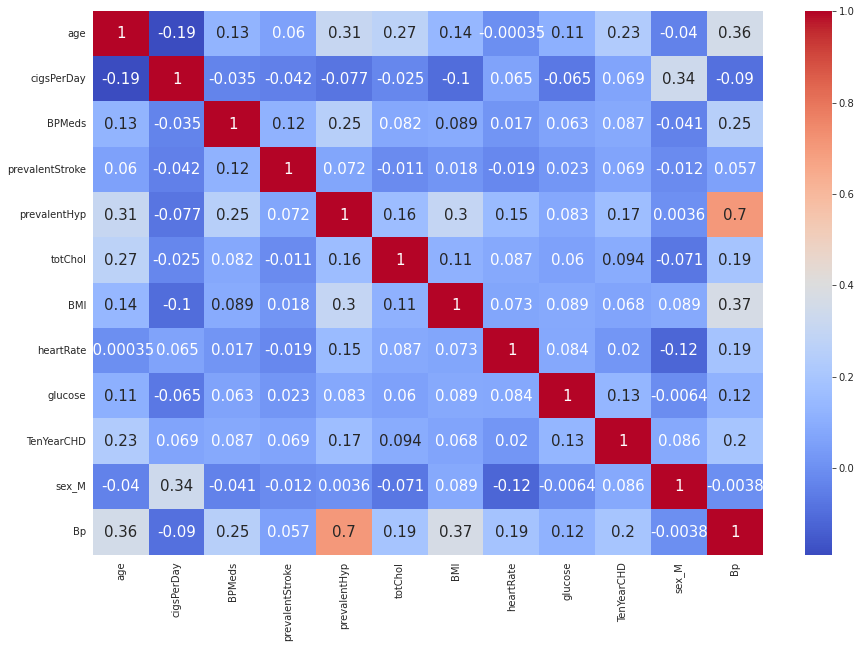

In [183]:
heat_map(df)

**Observations**

* Bp and prevalentHYP are also strongly associated to solar radiaiton. So, we can drop prevalentHYP.

In [184]:
df = df.drop(['prevalentHyp'] , 1)

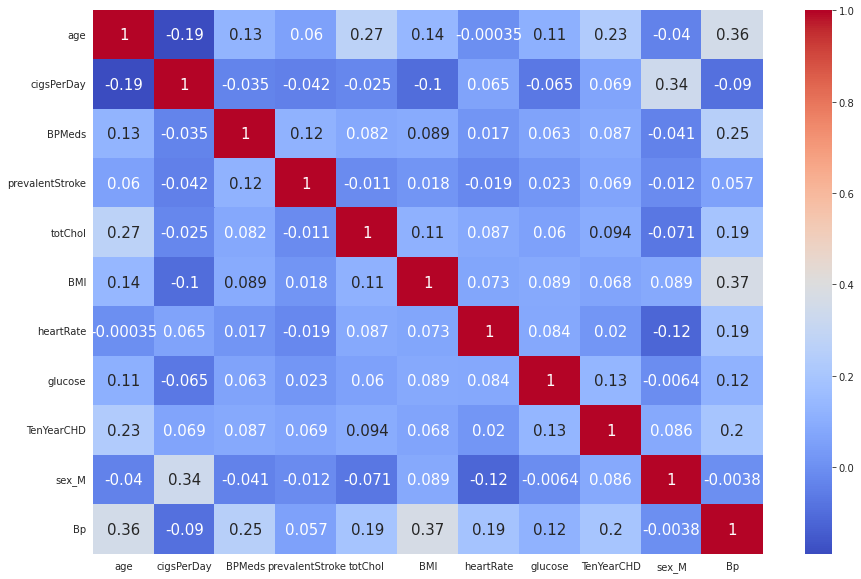

In [185]:
heat_map(df)

* Let's check our dependent variable and its skewedness.

504
2848


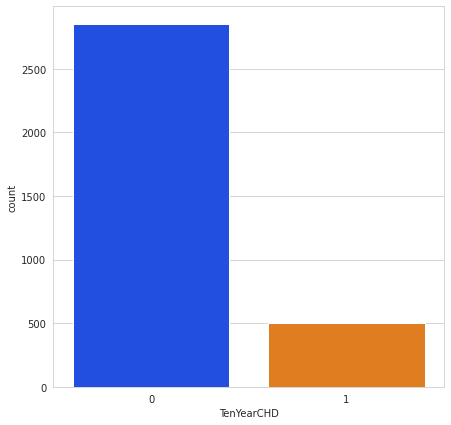

In [186]:
# Class count
class_count_0, class_count_1 = df['TenYearCHD'].value_counts()
print(class_count_1)
print(class_count_0)
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD' , data = df , palette='bright')



**Observations**
* We can Class Imbalance in our dependent variable with 2848 records of class 0 and only 504 records of class 1.
* To tackle this class imbalance problem, we can perform **SMOTE** (Synthetic Minority Oversampling Technique) to overcome the overfitting problem posed by random oversampling. 


* EDA and Feature Engineering are complete. Our data is now ready to be fed into the models; it has all of the columns in the format that the models require.
* Before feding into the model. Data has to be divided into train and test split.

# **Model Selection**

In [187]:
##### Machine Learning Module

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

import seaborn as sns 
import matplotlib.pyplot as plt

import numpy as np                               # vectors and matrices
import pandas as pd  

#-----------------------------------------------------------------------------------------------------------------------#
# Machine learning model fucntion

# This fucntion will iterate over the ML models provided by the user in the list.
def model_selection(X_train,y_train,X_test,y_test,models):
    accuracies = {}
    recall = {}

    for model in models:
        model_name = str(model).split('.')[-1][:-2]
        print("Model :",model_name)
        model =model().fit(X_train,y_train)
        y_pred = model.predict(X_test)
        acc = model.score(X_test,y_test)*100
        accuracies[model_name] = acc
        print(confusion_matrix(y_test, y_pred))
        print("Accuracy  : ",accuracy_score(y_test, y_pred))
        print("Precision : ",precision_score(y_test, y_pred))
        print("Recall    : ",recall_score(y_test, y_pred))
        print("F1        : ",f1_score(y_test, y_pred))
        rec = (recall_score(y_test, y_pred))
        recall[model_name] = rec*100
        print('-'*50)
#-----------------------------------------------------------------------------------------------------------------------#        
# Function for creating a dictionary of all ML model recall values.
def recall_dict(X_train,y_train,X_test,y_test,models):
    recall = []
    modelnames = []
    for model in models:
        model_name = str(model).split('.')[-1][:-2]
        modelnames.append(model_name)
        model =model().fit(X_train,y_train)
        y_pred = model.predict(X_test)
        rec = (recall_score(y_test, y_pred))
        recall.append(rec)
    recall_list = []
    recall_list.insert(0,modelnames)
    recall_list.insert(1,recall)
#     print(f"before {recall_list}")
    recall_dict = {}
    i = 0
    counter = len(models)
    while i < counter:
        recall_dict[recall_list[0][i]] = recall_list[1][i]
        i+=1
#     print(f"after {recall_dict}")
    return recall_dict

# Function for creating a dictionary of all ML model accuracy values.
def accuracy_dict(X_train,y_train,X_test,y_test,models):
    accuracy = []
    modelnames = []
    for model in models:
        model_name = str(model).split('.')[-1][:-2]
        modelnames.append(model_name)
        model =model().fit(X_train,y_train)
        y_pred = model.predict(X_test)
        acc = model.score(X_test,y_test)
        accuracy.append(acc)
    accuracy_list = []
    accuracy_list.insert(0,modelnames)
    accuracy_list.insert(1,accuracy)
#     print(f"before {accuracy_list}")
    accuracy_dict = {}
    i = 0
    counter = len(models)
    while i < counter:
        accuracy_dict[accuracy_list[0][i]] = accuracy_list[1][i]
        i+=1
#     print(f"after {accuracy_dict}")  
    return accuracy_dict
#-----------------------------------------------------------------------------------------------------------------------#        
# Function to plot recall bar graph of ML models.
def recall_plots(recall):
    colors = ["purple", "green", "orange", "magenta"]   
    sns.set_style("whitegrid")
    plt.figure(figsize=(16,5))
    plt.yticks(np.arange(0,100,5))
    plt.ylabel("Recall %")
    plt.xlabel("Algorithms")
    sns.barplot(x=list(recall.keys()), y=list(recall.values()), palette=colors)
    plt.show()

# Function to plot accuracy bar graph of ML models.    
def accuracy_plots(accuracies):
    colors = ["purple", "green", "orange", "magenta"]
    sns.set_style("whitegrid")
    plt.figure(figsize=(16,5))
    plt.yticks(np.arange(0,100,5))
    plt.ylabel("Accuracy %")
    plt.xlabel("Algorithms")
    sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
    plt.show()
#-----------------------------------------------------------------------------------------------------------------------#  

## Train-test Split

* We must separate the independent features, i.e., X, from the dependent features, i.e., Y.

In [188]:
X = df.drop(['TenYearCHD'], axis = 1)
y = df['TenYearCHD']

In [189]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.3, random_state = 11) 
print(X_train.shape)
print(X_test.shape)

(2346, 10)
(1006, 10)


* In train-test split, we have given 80% of the records to the test data and 30% of the record to the train dataset.

In [190]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

* Before applying any machine learning algorithm, it is always better to standardize the columns.
* Distance-based algorithm like Linear regression, KNN are sensitive to this while Tree-based algorithm like Decision Trees, Random forest are fairly insensitive to this transformation.

## Model Run

In model selection,we have run this dataset on four algorithms: **LogisticRegression, GaussianNB, KNeighborsClassifier, DecisionTreeClassifier**. Following that, we evaluated the model using key metrics such as **Mean Recall, Precision, F1score, and confusion Matrix**.

In [191]:
df.head()

,age,cigsPerDay,BPMeds,prevalentStroke,totChol,BMI,heartRate,glucose,TenYearCHD,sex_M,Bp
0,64,3.0,0.0,0,221.0,25.794964,90.0,80.0,1,0,233.0
1,36,0.0,0.0,0,212.0,29.770000,72.0,75.0,0,1,266.0
2,46,10.0,0.0,0,250.0,20.350000,88.0,94.0,0,0,187.0
3,50,20.0,0.0,0,233.0,28.260000,68.0,94.0,1,1,246.0
4,64,30.0,0.0,0,241.0,26.420000,70.0,77.0,0,0,221.5


In [192]:
models = [LogisticRegression, GaussianNB, KNeighborsClassifier, DecisionTreeClassifier ]
model_selection(X_train,y_train,X_test,y_test,models)

Model : LogisticRegression
[[857   7]
 [124  18]]
Accuracy  :  0.8697813121272365
Precision :  0.72
Recall    :  0.1267605633802817
F1        :  0.2155688622754491
--------------------------------------------------
Model : GaussianNB
[[830  34]
 [115  27]]
Accuracy  :  0.8518886679920478
Precision :  0.4426229508196721
Recall    :  0.19014084507042253
F1        :  0.2660098522167488
--------------------------------------------------
Model : KNeighborsClassifier
[[829  35]
 [120  22]]
Accuracy  :  0.8459244532803181
Precision :  0.38596491228070173
Recall    :  0.15492957746478872
F1        :  0.2211055276381909
--------------------------------------------------
Model : DecisionTreeClassifier
[[737 127]
 [108  34]]
Accuracy  :  0.7664015904572564
Precision :  0.2111801242236025
Recall    :  0.23943661971830985
F1        :  0.22442244224422442
--------------------------------------------------


## Error Plots

In [193]:
recall = recall_dict(X_train,y_train,X_test,y_test,models)
accuracy = accuracy_dict(X_train,y_train,X_test,y_test,models)

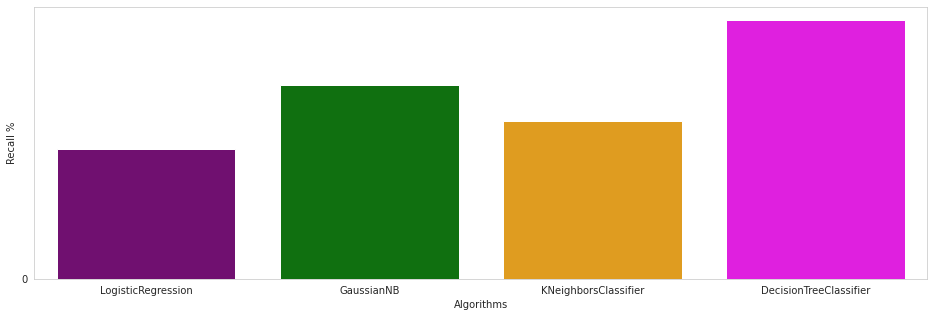

In [194]:
recall_plots(recall)

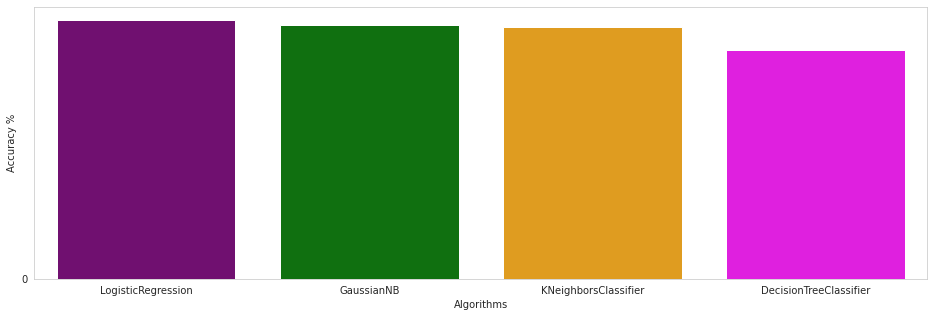

In [195]:
accuracy_plots(accuracy)

## Model Run (SMOTE)

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)

In [197]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [198]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [199]:
smote=SMOTE(random_state=5)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_smote)))

The number of classes before fit Counter({0: 2143, 1: 371})
The number of classes after fit Counter({1: 2143, 0: 2143})


In [200]:
models = [LogisticRegression, GaussianNB, KNeighborsClassifier, DecisionTreeClassifier ]
model_selection(X_train_smote,y_train_smote,X_test,y_test,models)

Model : LogisticRegression
[[468 237]
 [ 37  96]]
Accuracy  :  0.6730310262529833
Precision :  0.2882882882882883
Recall    :  0.7218045112781954
F1        :  0.41201716738197425
--------------------------------------------------
Model : GaussianNB
[[664  41]
 [ 95  38]]
Accuracy  :  0.837708830548926
Precision :  0.4810126582278481
Recall    :  0.2857142857142857
F1        :  0.3584905660377359
--------------------------------------------------
Model : KNeighborsClassifier
[[471 234]
 [ 60  73]]
Accuracy  :  0.649164677804296
Precision :  0.23778501628664495
Recall    :  0.5488721804511278
F1        :  0.33181818181818185
--------------------------------------------------
Model : DecisionTreeClassifier
[[566 139]
 [ 84  49]]
Accuracy  :  0.733890214797136
Precision :  0.26063829787234044
Recall    :  0.3684210526315789
F1        :  0.3052959501557632
--------------------------------------------------


## Error Plots (SMOTE)

In [201]:
recall_smote = recall_dict(X_train_smote,y_train_smote,X_test,y_test,models)
accuracy_smote = accuracy_dict(X_train_smote,y_train_smote,X_test,y_test,models)

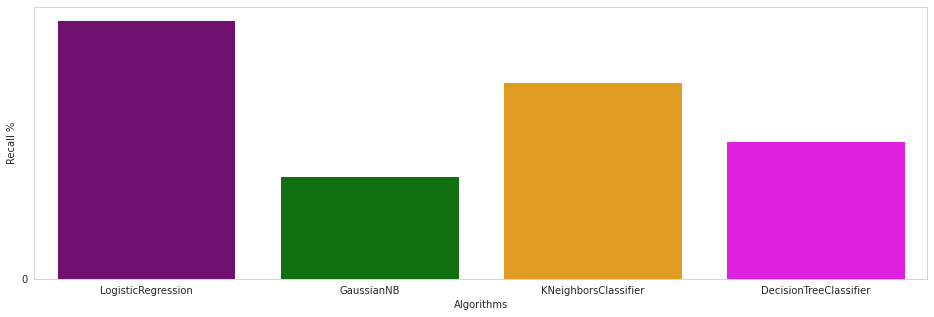

In [202]:
recall_plots(recall_smote)

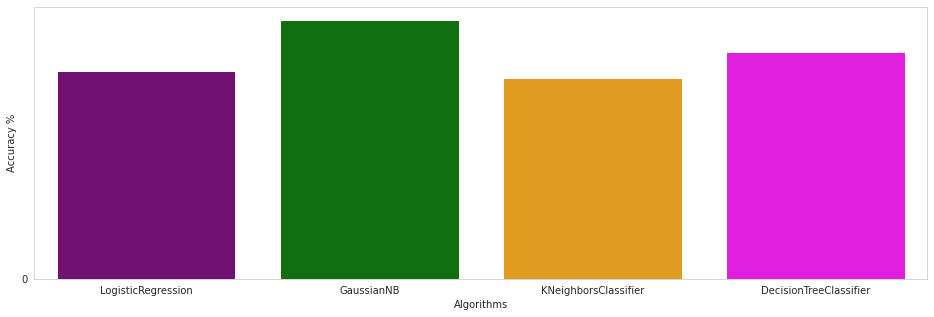

In [203]:
accuracy_plots(accuracy_smote)

# **Hyperparameter Optimization**

In [204]:
print("Model : Logistic Regression(Test) ")
penalty = ['l2']
C = [0.01, 0.1, 1, 2, 10, 100]
hyperparameters = dict(C=C, penalty=penalty)
logistic = LogisticRegression()
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
log=GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
log.fit(X_train_smote,y_train_smote)
print(log.best_estimator_)
y_pred = log.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))

Model : Logistic Regression(Test) 
LogisticRegression(C=0.1)
[[466 239]
 [ 37  96]]
Accuracy  :  0.6706443914081146
Precision :  0.2865671641791045
Recall    :  0.7218045112781954
F1        :  0.41025641025641024


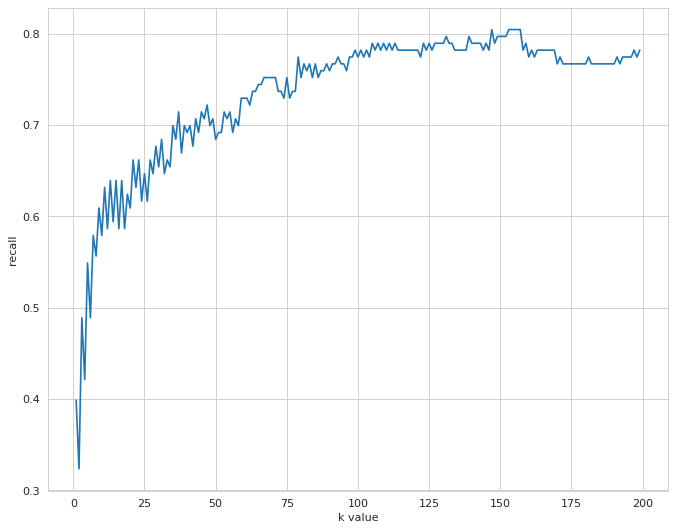

In [205]:
k_range=range(1,200)
scores=[]
Recall = {}
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_smote,y_train_smote)
    y_pred=knn.predict(X_test)
    scores.append(recall_score(y_test, y_pred))
    Recall[k] = recall_score(y_test, y_pred)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)
plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('recall')

plt.show()

In [208]:
print("Recall is Max at K :" , max(Recall, key=Recall.get))
grid_params = { 'n_neighbors' : [147,152],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
print("Model : KNeighborsClassifier(Test) ")

knn= GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
knn.fit(X_train_smote,y_train_smote)
print(knn.best_estimator_)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))


Recall is Max at K : 147
Model : KNeighborsClassifier(Test) 
Fitting 3 folds for each of 12 candidates, totalling 36 fits
KNeighborsClassifier(n_neighbors=147, weights='distance')
[[420 285]
 [ 26 107]]
Accuracy  :  0.6288782816229117
Precision :  0.2729591836734694
Recall    :  0.8045112781954887
F1        :  0.4076190476190476


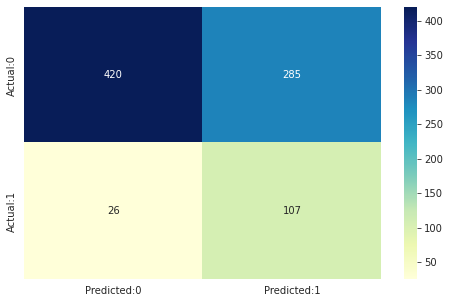

In [210]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# **Conclusion**


**Observations -**

* We ran our dataset on four models, i.e., **LogisticRegression, GaussianNB, KNeighborsClassifier, DecisionTreeClassifier**.

* Our dependent variable, TenYearCHD, exhibits a class imbalance, according to our findings. As a result, we test the model using the same sample as well as a sample on which SMOTE is performed.

* Because our issue statement involves medical concerns, we must emphasise the recall (false negative) performance matrix above other performance matrixes such as accuracy, F1, and so on.

* We did not select any model on the default dataset because all of the models' performance matrices yielded the poorest results.

* We selected two models: LogisticRegression and KNeighborsClassifier, which had recalls of 0.72 and 0.54, respectively, after applying SMOTE on the data set and then applying machine learning models to it.

* we used GridsearchCV to do hyperparameter optimization and tweak our model to achieve the best possible outcome and were able to raise recall to 0.80 for KNeighborsClassifier but not so much for LogisticRegression.

* As a result, the importance of performance metrics has increased. which are seen below. Accuracy : 0.62 Recall : 0.80 Precision : 0.27 F1 : 0.40.
